<a href="https://colab.research.google.com/github/subair99/ML_Zoomcamp_2022/blob/main/ML_Zoomcamp_Session__4_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework

### Dataset
In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

In [5]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab_Notebooks/ML_Zoomcamp_2022

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/ML_Zoomcamp_2022


In [6]:
# Import required models
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Preparation
Create the target variable by mapping yes to 1 and no to 0.
Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.

In [7]:
# Read dataset to dataframe
df = pd.read_csv('ML_Zoomcamp_Session_#4_data.csv')

In [8]:
# Check of the dataset head
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [9]:
# Check of the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [10]:
# Check missing values
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [11]:
# Create target variable with the card column
df['card'] = pd.Series([1 if x == 'yes' else 0 for x in df['card']])

# Check of the dataset again
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [12]:
# Split to full_train and test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Split to train and val
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Check length of splits
len(df_train), len(df_val), len(df_test)

(791, 264, 264)

### Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the card variable.
Use the training dataset for that.
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

1. reports
2. dependents
3. active
4. share

In [13]:
# Correlation matrix for the numerical features
full_corr = df_train.select_dtypes(include='number').corr()
full_corr

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active
card,1.000000,-0.448771,-0.033578,0.102310,0.406993,0.391337,-0.056133,-0.033637,0.074889,0.107173
reports,-0.448771,1.000000,0.068338,0.011723,-0.184150,-0.155980,0.047284,0.092652,-0.009905,0.193648
age,-0.033578,0.068338,1.000000,0.330704,-0.134377,-0.012830,0.193530,0.432739,0.009260,0.174938
income,0.102310,0.011723,0.330704,1.000000,-0.047710,0.275094,0.347707,0.149411,0.132426,0.199339
share,0.406993,-0.184150,-0.134377,-0.047710,1.000000,0.860663,-0.081944,-0.062992,0.031487,-0.018890
expenditure,0.391337,-0.155980,-0.012830,0.275094,0.860663,1.000000,0.065265,-0.049763,0.059372,0.025001
dependents,-0.056133,0.047284,0.193530,0.347707,-0.081944,0.065265,1.000000,-0.007287,-0.009146,0.111082
months,-0.033637,0.092652,0.432739,0.149411,-0.062992,-0.049763,-0.007287,1.000000,-0.059969,0.120950
majorcards,0.074889,-0.009905,0.009260,0.132426,0.031487,0.059372,-0.009146,-0.059969,1.000000,0.105297
active,0.107173,0.193648,0.174938,0.199339,-0.018890,0.025001,0.111082,0.120950,0.105297,1.000000


In [14]:
# Reset index
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

# Create target values
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

# Delete median_house_value columns
del df_train['card']
del df_val['card']
del df_test['card']

In [15]:
# Columns having negative correlation with cards
neg_col = ['reports', 'age', 'dependents', 'months']

# Copy training dataframes
tX_col = df_train.copy()
vX_col = df_val.copy()

# Copy testing dataframes
ty_col = y_test.copy()
vy_col = y_val.copy()

# Apply negative to negative correlation columns
for ncol in neg_col:
  tX_col[ncol] = -tX_col[ncol]
  vX_col[ncol] = -vX_col[ncol]

# Show output
print(tX_col.head())
print(vX_col.head())

      reports       age  income     share  expenditure owner selfemp  \
1105       -3 -40.50000  4.0128  0.000299      0.00000    no      no   
431        -1 -32.33333  6.0000  0.000200      0.00000   yes      no   
407        -1 -29.16667  2.2000  0.038205     69.79333    no      no   
1217       -1 -54.66667  7.2900  0.106536    647.20670   yes      no   
1133        0 -25.00000  3.3984  0.000353      0.00000   yes      no   

      dependents  months  majorcards  active  
1105          -1     -12           1      17  
431           -4     -18           1       4  
407            0     -49           1       7  
1217          -2     -78           1       9  
1133          -2     -29           0       4  
      reports       age  income     share  expenditure owner selfemp  \
1081        0 -24.00000  2.7811  0.052555    121.63330    no      no   
479         0 -34.25000  1.9440  0.000617      0.00000    no      no   
317         0 -39.75000  2.4200  0.017019     34.15583   yes      no 

In [16]:
# Create function to run each column

def auc_col(col):

  train_X = np.array(tX_col[col].copy()).reshape(-1, 1)
  val_X = np.array(vX_col[col].copy()).reshape(-1, 1)
  train_y = y_train.copy()
  val_y = y_val.copy()

  # Instantiate logistic regression
  model = LogisticRegression()

  # Fit model on data
  model.fit(train_X, train_y)

  # Return val probabilities
  val_pred = model.predict_proba(val_X)[:,1]

  # Compute fpr and tpr
  fpr, tpr, threshold = roc_curve(val_y, val_pred)

  # return AUC
  return round(auc(fpr, tpr), 3)


In [17]:
# Calculate UAC score for the required columns
col_list = ['reports', 'age', 'income', 'share', 'expenditure', 
            'dependents', 'months', 'majorcards', 'active']

for r_col in col_list:
  print('AUC score for ' + str(r_col) + ':', auc_col(r_col))

AUC score for reports: 0.714
AUC score for age: 0.438
AUC score for income: 0.564
AUC score for share: 0.986
AUC score for expenditure: 0.983
AUC score for dependents: 0.468
AUC score for months: 0.491
AUC score for majorcards: 0.563
AUC score for active: 0.548


Answer: share

### Training the model
From now on, use these columns only:

["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

### Question 2
What's the AUC of this model on the validation dataset? (round to 3 digits)

1. 0.615
2. 0.515
3. 0.715
4. 0.995

In [18]:
# Create function to calculate AUC

def AUC_thresh(val_thresh):

  df = pd.read_csv('ML_Zoomcamp_Session_#4_data.csv')

  # Convert to numerical columns
  df['card'] = pd.Series([1 if x == 'yes' else 0 for x in df['card']])

  # Split to full_train and test
  df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

  # Split to train and val
  df_train, df_val = train_test_split(df_full_train, 
                                      test_size=0.25, random_state=42)

  # Reset index
  df_train.reset_index(drop=True)
  df_val.reset_index(drop=True)
  df_test.reset_index(drop=True)

  # Create target values
  y_train = df_train.card.values
  y_val = df_val.card.values
  y_test = df_test.card.values

  # Delete median_house_value columns
  del df_train['card']
  del df_val['card']
  del df_test['card']

  # Convert to dictionary
  train_dict = df_train.to_dict(orient='records')
  val_dict = df_val.to_dict(orient='records')

  # Instantiate a dict vectoriser
  dv = DictVectorizer(sparse=False)

  # Fit and transform dictionaries with dv
  train_X = dv.fit_transform(train_dict)
  val_X = dv.fit_transform(val_dict)

  # Instantiate y values
  train_y = y_train.copy()
  val_y = y_val.copy()

  # Instantiate logistic regression
  model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

  # Fit model on data
  model.fit(train_X, train_y)

  # Return val probabilities
  val_prob = model.predict_proba(val_X)[:,1]

  # Compute predictions
  val_pred = pd.Series([1 if x >= val_thresh else 0 for x in val_prob])

  # Compute fpr and tpr
  fpr, tpr, threshold = roc_curve(val_y, val_pred)

  # return AUC
  return round(auc(fpr, tpr), 3)

In [19]:
# Calculate UAC
print('AUC:', AUC_thresh(0.5))

AUC: 0.979


Answer: 0.995

### Question 3
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

1. 0.1
2. 0.3
3. 0.6
4. 0.8

In [20]:
# Create function to calculate precision and recall

def AUC_thresh(val_thresh):

  df = pd.read_csv('ML_Zoomcamp_Session_#4_data.csv')

  # Convert to numerical columns
  df['card'] = pd.Series([1 if x == 'yes' else 0 for x in df['card']])

  # Split to full_train and test
  df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

  # Split to train and val
  df_train, df_val = train_test_split(df_full_train, 
                                      test_size=0.25, random_state=42)

  # Reset index
  df_train.reset_index(drop=True)
  df_val.reset_index(drop=True)
  df_test.reset_index(drop=True)

  # Create target values
  y_train = df_train.card.values
  y_val = df_val.card.values
  y_test = df_test.card.values

  # Delete median_house_value columns
  del df_train['card']
  del df_val['card']
  del df_test['card']

  # Convert to dictionary
  train_dict = df_train.to_dict(orient='records')
  val_dict = df_val.to_dict(orient='records')

  # Instantiate a dict vectoriser
  dv = DictVectorizer(sparse=False)

  # Fit and transform dictionaries with dv
  train_X = dv.fit_transform(train_dict)
  val_X = dv.fit_transform(val_dict)

  # Instantiate y values
  train_y = y_train.copy()
  val_y = y_val.copy()

  # Instantiate logistic regression
  model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

  # Fit model on data
  model.fit(train_X, train_y)

  # Return val probabilities
  val_pred = model.predict_proba(val_X)[:,1]

  # Compute true and false values
  act_pos = val_y == 1
  act_neg = val_y == 0
  pred_pos = val_pred >= val_thresh
  pred_neg = val_pred < val_thresh
  tp = (pred_pos & act_pos).sum()
  tn = (pred_neg & act_neg).sum()
  fp = (pred_pos & act_neg).sum()
  fn = (pred_neg & act_pos).sum()

  # Compute precision and recall
  val_pre = round(tp / (tp + fp), 3)
  val_rec = round(tp / (tp + fn), 3)

  # return threshold, precision and recall
  return (val_thresh, val_pre, val_rec)

In [21]:
# Create dataframe for the threshold, precision and recall
thresholds = np.arange(0.0, 1.0, 0.01)
columns = ['t', 'P', 'R']

val_df = pd.DataFrame([AUC_thresh(x) for x in thresholds], columns=columns)

In [22]:
# View few entries of dataframe
val_df.head(10)

,t,P,R
0,0.00,0.777,1.000
1,0.01,0.830,1.000
2,0.02,0.854,1.000
3,0.03,0.865,1.000
4,0.04,0.875,0.990
5,0.05,0.883,0.990
6,0.06,0.886,0.985
7,0.07,0.894,0.985
8,0.08,0.902,0.985
9,0.09,0.902,0.985


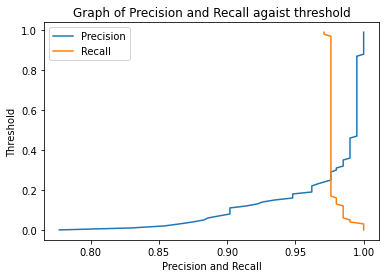

In [23]:
# Plot precision against recall for all threshold
plt.plot(val_df.P, val_df.t, label='Precision')
plt.plot(val_df.R, val_df.t, label='Recall')
plt.title('Graph of Precision and Recall agaist threshold')
plt.xlabel('Precision and Recall')
plt.ylabel('Threshold')
plt.legend();

Answer: 0.3

### Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

1. 0.1
2. 0.4
3. 0.6
4. 0.7

In [24]:
# Create F1 column in val_df
val_df['F1'] = 2 * val_df.P * val_df.R / (val_df.P + val_df.R)

In [25]:
# View few entries of dataframe
val_df.head(10)

,t,P,R,F1
0,0.00,0.777,1.000,0.874508
1,0.01,0.830,1.000,0.907104
2,0.02,0.854,1.000,0.921251
3,0.03,0.865,1.000,0.927614
4,0.04,0.875,0.990,0.928954
5,0.05,0.883,0.990,0.933444
6,0.06,0.886,0.985,0.932881
7,0.07,0.894,0.985,0.937296
8,0.08,0.902,0.985,0.941675
9,0.09,0.902,0.985,0.941675


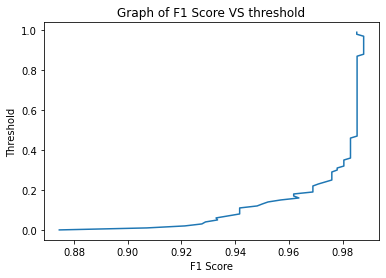

In [26]:
# Plot F1 for all threshold
plt.plot(val_df.F1, val_df.t)
plt.title('Graph of F1 Score VS threshold')
plt.xlabel('F1 Score')
plt.ylabel('Threshold');

Answer: 0.7

### Question 5
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard devidation of the AUC scores across different folds?

1. 0.003
2. 0.014
3. 0.09
4. 0.24

In [39]:
# Create function to calculate AUC with KFold

def AUC_KFold_std():

  df = pd.read_csv('ML_Zoomcamp_Session_#4_data.csv')

  # Convert to numerical columns
  df['card'] = pd.Series([1 if x == 'yes' else 0 for x in df['card']])

  # Split to full_train and test
  df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

  # Reset index
  df_full_train.reset_index(drop=True)

  # Create target values
  y_train = df_full_train.card.values

  # Delete median_house_value columns
  del df_full_train['card']

  # Convert to dictionary
  train_dict = df_full_train.to_dict(orient='records')

  # Instantiate a dict vectoriser
  dv = DictVectorizer(sparse=False)

  # Fit and transform dictionaries with dv
  X = dv.fit_transform(train_dict)
  y = y_train

  # Prepare the cross-validation procedure
  cv = KFold(n_splits=5, random_state=1, shuffle=True)

  # Create model
  model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

  # Evaluate model
  scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

  # report performance
  return round(np.std(scores), 3)

In [40]:
print('AUC std: ', AUC_KFold_std())

AUC std:  0.003


Answer: 0.003

### Question 6
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 1, 10]
Initialize KFold with the same parameters as previously
Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

1. 0.01
2. 0.1
3. 1
4. 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [43]:
# Create function to find best parameter with KFold

def AUC_KFold(C):

  df = pd.read_csv('ML_Zoomcamp_Session_#4_data.csv')

  # Convert to numerical columns
  df['card'] = pd.Series([1 if x == 'yes' else 0 for x in df['card']])

  # Split to full_train and test
  df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

  # Reset index
  df_full_train.reset_index(drop=True)

  # Create target values
  y_train = df_full_train.card.values

  # Delete median_house_value columns
  del df_full_train['card']

  # Convert to dictionary
  train_dict = df_full_train.to_dict(orient='records')

  # Instantiate a dict vectoriser
  dv = DictVectorizer(sparse=False)

  # Fit and transform dictionaries with dv
  X = dv.fit_transform(train_dict)
  y = y_train

  # Prepare the cross-validation procedure
  cv = KFold(n_splits=5, random_state=1, shuffle=True)

  # Create model
  model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)

  # Evaluate model
  scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

  # report performance
  return round(np.mean(scores), 3), round(np.std(scores), 3)

In [45]:
C_list = [0.01, 0.1, 1, 10]

for CC in C_list:
  print('AUC score for C = ' + str(CC) + ': ' 
        + 'mean - ' + str(AUC_KFold(CC)[0]) + '; '
        + 'std - ' + str(AUC_KFold(CC)[1])
        )

AUC score for C = 0.01: mean - 0.992; std - 0.006
AUC score for C = 0.1: mean - 0.995; std - 0.004
AUC score for C = 1: mean - 0.996; std - 0.003
AUC score for C = 10: mean - 0.996; std - 0.003


Answer: 1